## Deep Learning Quick Reference

### Linear Regression using Keras

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

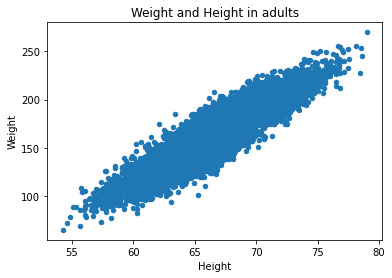

In [2]:
# Reading in and plotting
df = pd.read_csv('./data/weight-height.csv')

# Plotting the Data
df.plot(kind='scatter', x='Height', y='Weight', title='Weight and Height in adults')

#### Fitting the model with Keras

In [3]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.optimizers import Adam, SGD 

In [4]:
# Saving the values
X = df[['Height']].values
y_true = df['Weight'].values

In [5]:
# One layer sequential model

model = Sequential()

# Using the height to predict weight
model.add(Dense(1, input_shape=(1,))) 

# mean squared error is the cost function
model.compile(Adam(lr=0.8), 'mean_squared_error') 

In [6]:
# Fitting
model.fit(X, y_true, epochs=40, verbose=0)

# Predicting
y_pred = model.predict(X)

In [7]:
# Evaluating
from sklearn.metrics import r2_score

print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.802


### Classification Problem with Keras
#### Seeing if an employee will leave the company

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Reading in the data
df = pd.read_csv('./data/HR_comma_sep.csv')

In [10]:
# Normalizing Everything with the Standard Scalar
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

In [11]:
# Getting Dummies and combining frames
sales = pd.get_dummies(df['sales'], prefix='sales')
salary = pd.get_dummies(df['salary'], prefix='salary')

frames = [df, sales, salary]

# Converting Sales and Salary to Numerical Values 
result = pd.concat(frames, axis=1, sort=False)

In [12]:
# Train test split
from sklearn.model_selection import train_test_split

# Splitting into X and y
X = result[['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'sales_hr', 'sales_management', 
               'sales_marketing', 'sales_product_mng', 'sales_sales', 'sales_support', 'sales_technical', 'salary_high', 'salary_low', 'salary_medium']]
y = result['left']

# Normalizing the average monthly hours
ss = StandardScaler()

X['average_montly_hours'] = ss.fit_transform(X[['average_montly_hours']])

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
# Building the model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(32, input_shape=(16,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, epochs=20, verbose=0) # , validation_split=0.1

In [15]:
# Results
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Predicting
y_pred = model.predict_classes(X_test) 

print(classification_report(y_test, y_pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      2853
           1       0.83      0.91      0.87       897

    accuracy                           0.94      3750
   macro avg       0.90      0.93      0.91      3750
weighted avg       0.94      0.94      0.94      3750



In [16]:
print(accuracy_score(y_test, y_pred))

0.9352


#### Multiclass Classification Problem

In [17]:
df = pd.read_csv('./data/wines.csv')
df.head(3)

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


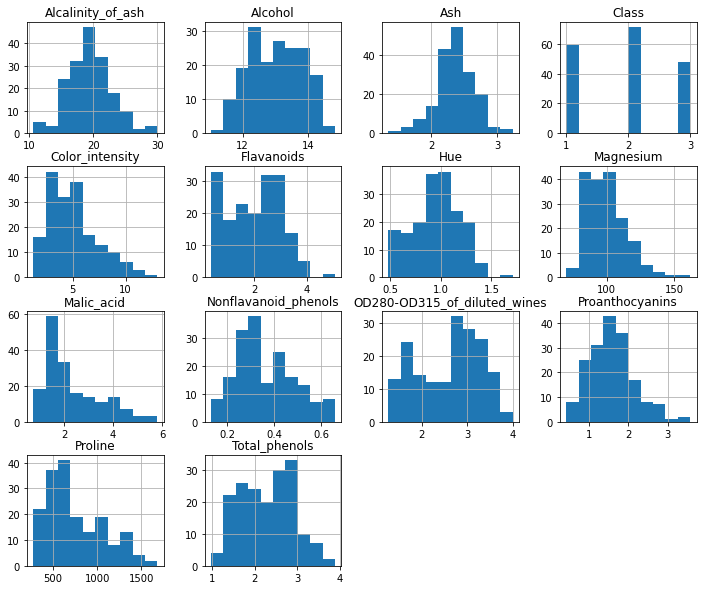

In [18]:
# Good plotting technique
_=df.hist(figsize=(12,10))

### Using a correlation plot

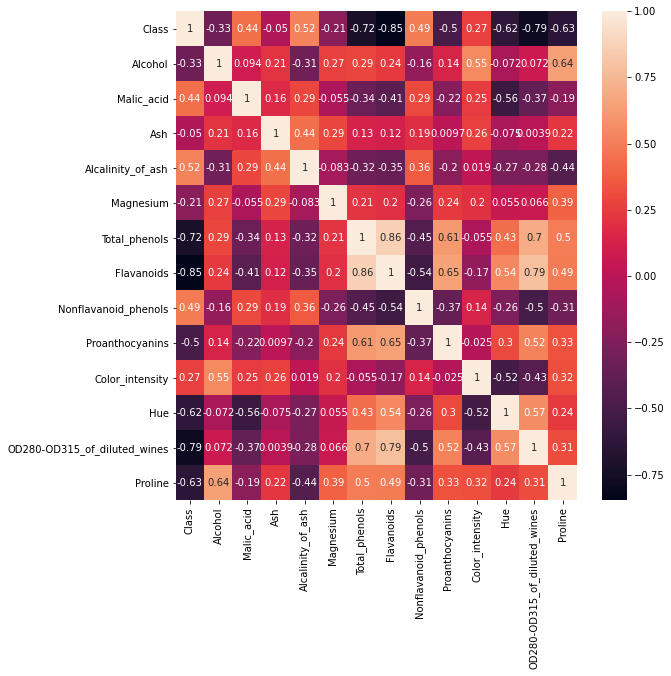

In [19]:
import seaborn as sns

# Correlation Plot
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), annot=True)

## Badass Drop Technique

In [20]:
# Dividing into X and Y 
X = df.drop('Class', axis=1)
y = df['Class']

# Transforming the Dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xsc = sc.fit_transform(X)

# Making sure y is multiple categories
y_cat = pd.get_dummies(y)

In [21]:
# Importing
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K

In [22]:
# Building the Model
K.clear_session()

model = Sequential()
model.add(Dense(32, input_shape=(13,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(Adam(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy']) # Notice Categorical Crossentropy instead of binary

#### Alternate model

In [23]:
# K.clear_session()

# model = Sequential()
# model.add(Dense(8, input_shape=(13,), activation='relu'))
# model.add(Dense(5, activation='relu'))
# model.add(Dense(2, activation='tanh'))
# model.add(Dense(3, activation='softmax'))
# model.compile(Adam(lr=0.1),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 1,603
Trainable params: 1,603
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Fitting and Evaluating
model.fit(Xsc, y_cat.values, epochs=5, verbose = 1, validation_split=0.3)

Epoch 1/5
4/4 [==============================] - 0s 37ms/step - loss: 0.5074 - accuracy: 0.8387 - val_loss: 22.9680 - val_accuracy: 0.1111
Epoch 2/5
4/4 [==============================] - 0s 5ms/step - loss: 0.1677 - accuracy: 0.9758 - val_loss: 56.7562 - val_accuracy: 0.1111
Epoch 3/5
4/4 [==============================] - 0s 4ms/step - loss: 0.0578 - accuracy: 0.9919 - val_loss: 84.1719 - val_accuracy: 0.1111
Epoch 4/5
4/4 [==============================] - 0s 4ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 105.7051 - val_accuracy: 0.1111
Epoch 5/5
4/4 [==============================] - 0s 5ms/step - loss: 0.0067 - accuracy: 0.9919 - val_loss: 122.8631 - val_accuracy: 0.1111


### Using the Functional API 
#### Much better performance

In [26]:
# Another Model

# K.clear_session()

# inputs = Input(shape=(13,))
# x = Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
# x = Dense(5, kernel_initializer='he_normal', activation='tanh')(x)
# second_to_last = Dense(2, kernel_initializer='he_normal',
#                        activation='tanh')(x)
# outputs = Dense(3, activation='softmax')(second_to_last)

# model = Model(inputs=inputs, outputs=outputs)

# model.compile(RMSprop(lr=0.05),
#               'categorical_crossentropy',
#               metrics=['accuracy'])

# model.fit(Xsc, y_cat.values, batch_size=16, epochs=20, verbose=1)

### Functional API Continued with Tensorboard
#### Also using early stopping
#### Validation Data is also passed into the model

#### Need to fix the file paths for Tensorboard (Luke Question)

In [27]:
from keras.layers import Input
from keras.models import Model

In [28]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

In [29]:
checkpointer = ModelCheckpoint(filepath="/tmp/udemy/weights.hdf5",
                               verbose=1, save_best_only=True)

In [30]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0,
                             patience=1, verbose=1, mode='auto')

tensorboard = TensorBoard(log_dir='/tmp/udemy/tensorboard/')

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xsc, y_cat.values,
                                                    test_size=0.3,
                                                    random_state=42)

In [32]:
K.clear_session()

inputs = Input(shape=(13,))

x = Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
x = Dense(5, kernel_initializer='he_normal', activation='tanh')(x)
second_to_last = Dense(2, kernel_initializer='he_normal',
                       activation='tanh')(x)
outputs = Dense(3, activation='softmax')(second_to_last)

model = Model(inputs=inputs, outputs=outputs)

model.compile(RMSprop(lr=0.05), 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32,
          epochs=20, verbose=2,
          validation_data=(X_test, y_test),
          callbacks=[checkpointer, earlystopper, tensorboard])

Epoch 1/20
Instructions for updating:
use `tf.profiler.experimental.stop` instead.

Epoch 00001: val_loss improved from inf to 0.43290, saving model to /tmp/udemy\weights.hdf5
4/4 - 1s - loss: 0.8114 - accuracy: 0.6694 - val_loss: 0.4329 - val_accuracy: 0.9074
Epoch 2/20

Epoch 00002: val_loss improved from 0.43290 to 0.20676, saving model to /tmp/udemy\weights.hdf5
4/4 - 0s - loss: 0.3625 - accuracy: 0.9355 - val_loss: 0.2068 - val_accuracy: 1.0000
Epoch 3/20

Epoch 00003: val_loss did not improve from 0.20676
4/4 - 0s - loss: 0.2200 - accuracy: 0.9597 - val_loss: 0.2277 - val_accuracy: 0.9444
Epoch 00003: early stopping


### Opening Tensorboard

Run Tensorboard with the command:

    tensorboard --logdir /tmp/udemy/tensorboard/
    
and open your browser at http://localhost:6006

## Convolutional Neural Networks

### Regular Neural Net Applied to Mnist

In [33]:
# Loading mnist
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [34]:
# Reshaping to flat
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [35]:
# Converting to floats and rescaling
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Makes its between 0 and 1 instead of 0 and 255
X_train /= 255.0
X_test /= 255.0

In [36]:
# Converting the 10 outputs to categories
from keras.utils.np_utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [37]:
# Building the model

K.clear_session()

model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [38]:
# Fitting
h = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, verbose=0, validation_split=0.3)

Text(0.5, 0, 'Epochs')

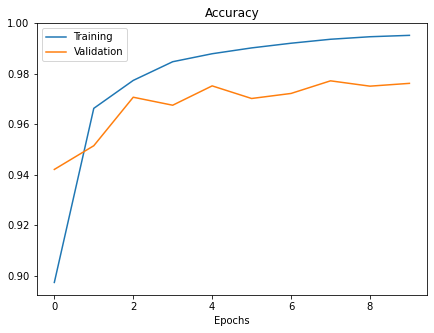

In [39]:
# Plot of the results
plt.figure(figsize=(7,5))
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [40]:
test_accuracy = model.evaluate(X_test, y_test_cat)[1]
test_accuracy

313/313 [==============================] - 0s 1ms/step - loss: 0.1151 - accuracy: 0.9788


0.9787999987602234

## Neural Net on Mnist

In [41]:
# Convolutional Layers
from keras.layers import Conv2D

# Pooling Layers
from keras.layers import MaxPool2D, AvgPool2D

# Flattening and Activation
from keras.layers import Flatten, Activation

In [42]:
# Importing mnist/making sure its in the right shape
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshaping
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Categories of y
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [43]:
K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [45]:
# Training 
model.fit(X_train, y_train_cat, batch_size=128, epochs=5, verbose=0, validation_split=0.3)

In [46]:
# Evaluation
model.evaluate(X_test, y_test_cat)[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.0566 - accuracy: 0.9875


0.987500011920929

## Recurrent Neural Networks on Time Series

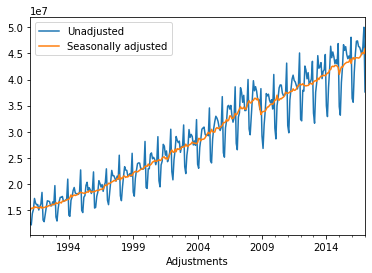

In [47]:
df = pd.read_csv('./data/cansim-0800020-eng-6674700030567901031.csv', skiprows=6, skipfooter=9, engine='python')

# Time series stuff with pandas
from pandas.tseries.offsets import MonthEnd

# Creating a date time object/setting the index
df['Adjustments'] = pd.to_datetime(df['Adjustments']) + MonthEnd(1)
df = df.set_index('Adjustments')

df.plot()

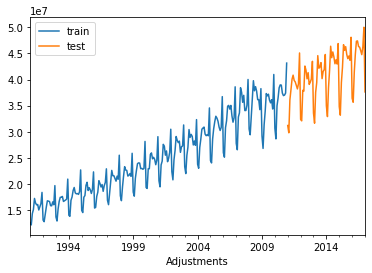

In [48]:
# Splitting for training and testing (not testing is always after splitting)
split_date = pd.Timestamp('01-01-2011')

train = df.loc[:split_date, ['Unadjusted']]
test = df.loc[split_date:, ['Unadjusted']]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [49]:
# Scaling the Data
from sklearn.preprocessing import MinMaxScaler

# Rescaling the data
sc = MinMaxScaler()

train_sc = sc.fit_transform(train)

# Only transform, not fit transform with the test 
test_sc = sc.transform(test)

In [50]:
# Aiming at the next point with the data
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [51]:
from keras.layers import LSTM

early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

In [52]:
# Reshaping to Tensors
X_train_t = X_train[:, None]
X_test_t = X_test[:, None]

In [53]:
K.clear_session()
model = Sequential()

model.add(LSTM(6, input_shape=(1, 1)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [54]:
# Notice the batch size of one
model.fit(X_train_t, y_train, epochs=50, batch_size=0, verbose=1, callbacks=[early_stop])

Epoch 1/50
8/8 [==============================] - 0s 1ms/step - loss: 0.1983
Epoch 2/50
8/8 [==============================] - 0s 1ms/step - loss: 0.1833
Epoch 3/50
8/8 [==============================] - 0s 2ms/step - loss: 0.1685
Epoch 4/50
8/8 [==============================] - 0s 1ms/step - loss: 0.1551
Epoch 5/50
8/8 [==============================] - 0s 2ms/step - loss: 0.1413
Epoch 6/50
8/8 [==============================] - 0s 2ms/step - loss: 0.1292
Epoch 7/50
8/8 [==============================] - 0s 1ms/step - loss: 0.1170
Epoch 8/50
8/8 [==============================] - 0s 2ms/step - loss: 0.1057
Epoch 9/50
8/8 [==============================] - 0s 1ms/step - loss: 0.0955
Epoch 10/50
8/8 [==============================] - 0s 1ms/step - loss: 0.0863
Epoch 11/50
8/8 [==============================] - 0s 1ms/step - loss: 0.0772
Epoch 12/50
8/8 [==============================] - 0s 1ms/step - loss: 0.0696
Epoch 13/50
8/8 [==============================] - 0s 1ms/step - loss: 0.

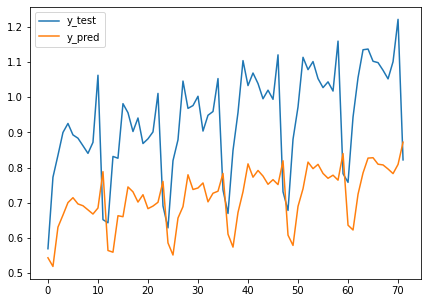

In [55]:
y_pred = model.predict(X_test_t)
plt.figure(figsize=(7,5))
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['y_test', 'y_pred'])

## Creating Windows

In [56]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)

# Shift function using Pandas 
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)
    
# Just moving the data by one month. Back in time up to a year.
train_sc_df.head(3)

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,,
1991-01-31,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-28,0.000000,0.01402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-31,0.070426,0.00000,0.01402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# Dropping null values and scaled (target)
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

In [58]:
# Creating Numpy Arrays
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values

### Building the LSTM

In [59]:
# Making tensors for the LSTM
X_train_t = X_train.reshape(X_train.shape[0], 1, 12)
X_test_t = X_test.reshape(X_test.shape[0], 1, 12)

In [60]:
K.clear_session()
model = Sequential()

model.add(LSTM(6, input_shape=(1, 12)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6)                 456       
_________________________________________________________________
dense (Dense)                (None, 1)                 7         
Total params: 463
Trainable params: 463
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.fit(X_train_t, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop])

Epoch 1/100
228/228 [==============================] - 0s 737us/step - loss: 0.0361
Epoch 2/100
228/228 [==============================] - 0s 746us/step - loss: 0.0097
Epoch 3/100
228/228 [==============================] - 0s 784us/step - loss: 0.0080
Epoch 4/100
228/228 [==============================] - 0s 826us/step - loss: 0.0075
Epoch 5/100
228/228 [==============================] - 0s 739us/step - loss: 0.0069
Epoch 6/100
228/228 [==============================] - 0s 776us/step - loss: 0.0064
Epoch 7/100
228/228 [==============================] - 0s 807us/step - loss: 0.0058
Epoch 8/100
228/228 [==============================] - 0s 854us/step - loss: 0.0053
Epoch 9/100
228/228 [==============================] - 0s 825us/step - loss: 0.0047
Epoch 10/100
228/228 [==============================] - 0s 760us/step - loss: 0.0042
Epoch 11/100
228/228 [==============================] - 0s 750us/step - loss: 0.0040
Epoch 12/100
228/228 [==============================] - 0s 746us/step - lo

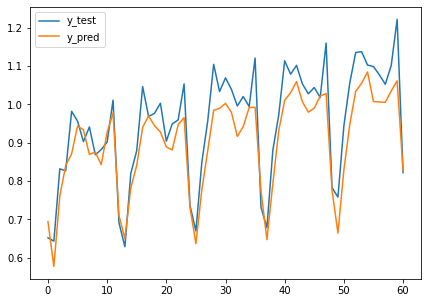

In [63]:
y_pred = model.predict(X_test_t)
plt.figure(figsize=(7,5))
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['y_test', 'y_pred'])